# Housing Data 5: Categorical Encoding

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

files_id = {
    'housing_data':"1Z6M90HU3Dx-qF_eHLxLASpCEEjGj9bEL"#,
    #'songs_1000':"1ANRezff5WhbAgQH1qo7csdUdHVMDjXe_",
    #'songs_5000': "1yvsAK-4k7t3gESXBBiRdZV0ec9wTMZVZ"

}


housing_data = pd.read_csv(gd_path(files_id['housing_data']), sep=",")
#songs_1000 = pd.read_csv(gd_path(files_id['songs_1000']), sep=",")
#songs_5000 = pd.read_csv(gd_path(files_id['songs_5000']), sep=",")

Data Description
1. `MSZoning`: Identifies the general zoning classification of the sale.
2. `Condition1`: Proximity to various conditions.
3. `Heating`: Type of heating.
4. `Street`: Type of road access to property.
5. `CentralAir`: Central air conditioning.
6. `Foundation`: Type of foundation.
7. `ExterQual`: Evaluates the quality of the material on the exterior.
8. `ExterCond`: Evaluates the present condition of the material on the exterior.
9. `BsmtQual`: Evaluates the height of the basement.
10. `BsmtCond`: Evaluates the general condition of the basement.
11. `BsmtExposure`: Refers to walkout or garden level walls.
12. `BsmtFinType1`: Rating of basement finished area.
13. `KitchenQual`: Kitchen quality.
14. `FireplaceQu`: Fireplace quality.
15. `MSSubClass`: Identifies the type of dwelling involved in the sale.
16. `OverallQual`: Rates the overall material and finish of the house.
17. `OverallCond`: Rates the overall condition of the house.
18. `YearBuilt`: Original construction date.
19. `YearRemodAdd`: Remodel date (same as construction date if no remodeling or additions).
20. `MasVnrArea`: Masonry veneer area in square feet.
21. `BsmtFinSF1`: Type 1 finished square feet.
22. `BsmtFinSF2`: Type 2 finished square feet.
23. `BsmtUnfSF`: Unfinished square feet of basement area.
24. `1stFlrSF`: First Floor square feet.
25. `2ndFlrSF`: Second floor square feet.
26. `LowQualFinSF`: Low quality finished square feet (all floors).
27. `GrLivArea`: Above grade (ground) living area square feet.
28. `BsmtFullBath`: Basement full bathrooms.
29. `BsmtHalfBath`: Basement half bathrooms.
30. `FullBath`: Full bathrooms above grade.
31. `HalfBath`: Half baths above grade.
32. `KitchenAbvGr`: Kitchens above grade.
33. `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms).
34. `GarageYrBlt`: Year garage was built.
35. `GarageArea`: Size of garage in square feet.
36. `OpenPorchSF`: Open porch area in square feet.
37. `EnclosedPorch`: Enclosed porch area in square feet.
38. `3SsnPorch`: Three season porch area in square feet.
39. `MiscVal`: $Value of miscellaneous feature.
40. `MoSold`: Month Sold (MM).
41. `YrSold`: Year Sold (YYYY).


In [2]:
housing_data.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630,...,1.046575,6.517808,1978.506164,472.980137,46.660274,21.954110,3.409589,43.489041,6.321918,2007.815753
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845,...,0.220338,1.625393,24.689725,213.804841,66.256028,61.119149,29.317331,496.123024,2.703626,1.328095
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,1980.000000,480.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000,...,1.000000,7.000000,2002.000000,576.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000,...,3.000000,14.000000,2010.000000,1418.000000,547.000000,552.000000,508.000000,15500.000000,12.000000,2010.000000


In [3]:
housing_data.sample(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,OpenPorchSF,EnclosedPorch,3SsnPorch,MiscVal,MoSold,YrSold
44,7945,70.0,1150,3,0,0,1,0,0,0,...,1,6,1959.0,300,0,0,0,0,5,2006
1194,9364,80.0,663,4,0,0,1,379,0,0,...,1,7,1969.0,299,36,0,0,0,3,2010
198,5520,92.0,755,5,0,0,0,0,0,0,...,1,8,NaN,0,198,30,0,0,7,2009
153,13500,NaN,1602,1,1,0,2,409,0,0,...,1,4,1960.0,564,0,0,0,0,3,2008
288,9819,NaN,882,3,0,0,1,0,0,0,...,1,5,1970.0,280,0,0,0,0,2,2010


## Split the Data

In [4]:
X = housing_data
y = housing_data.pop('Expensive')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [7]:
X_train.select_dtypes(exclude="number")

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
772,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,Av,ALQ,TA,TA
157,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Ex,TA,No,Unf,Ex,Gd
360,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Av,GLQ,TA,TA
744,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,TA
150,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,Av,BLQ,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,RL,Norm,GasA,Pave,Y,PConc,Gd,TA,Gd,TA,No,Unf,Gd,NaN
679,RL,Norm,GasA,Pave,Y,CBlock,TA,TA,TA,TA,No,Rec,TA,NaN
1449,RM,Norm,GasA,Pave,Y,CBlock,TA,TA,Gd,TA,Av,GLQ,Ex,NaN
322,RL,Norm,GasA,Pave,Y,CBlock,Gd,TA,TA,TA,Gd,LwQ,Gd,TA


## Decision Tree

In [6]:
y_train

772     0
157     1
360     0
744     0
150     0
       ..
252     0
679     0
1449    0
322     1
1391    0
Name: Expensive, Length: 1168, dtype: int64

In [9]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

#X_num_train = X_train.select_dtypes(include="number")

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

### Dealing with missing/corrupt data

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [12]:
# 2. use fit on the train set
my_imputer.fit(X_train)

SimpleImputer()

Recomindation: only with train data!

In [13]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_train)

In [14]:
X_num_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [15]:
X_train.isnull().sum()

LotArea           0
LotFrontage     202
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

## Implement a Decision Tree (numerical features + missing values imputed)

In [16]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)

my_tree = DecisionTreeClassifier(max_depth = 4,min_samples_leaf=5) # remove 'max_depth' for the full tree


# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

### Check accuracy for the train set

In [17]:
# make predictions
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

In [18]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

0.9323630136986302

### Check accuracy for the test set

In [19]:
# impute NaN's to test set
X_num_imputed_test = my_imputer.transform(X_test)

In [20]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

In [21]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.9246575342465754

TILL now!

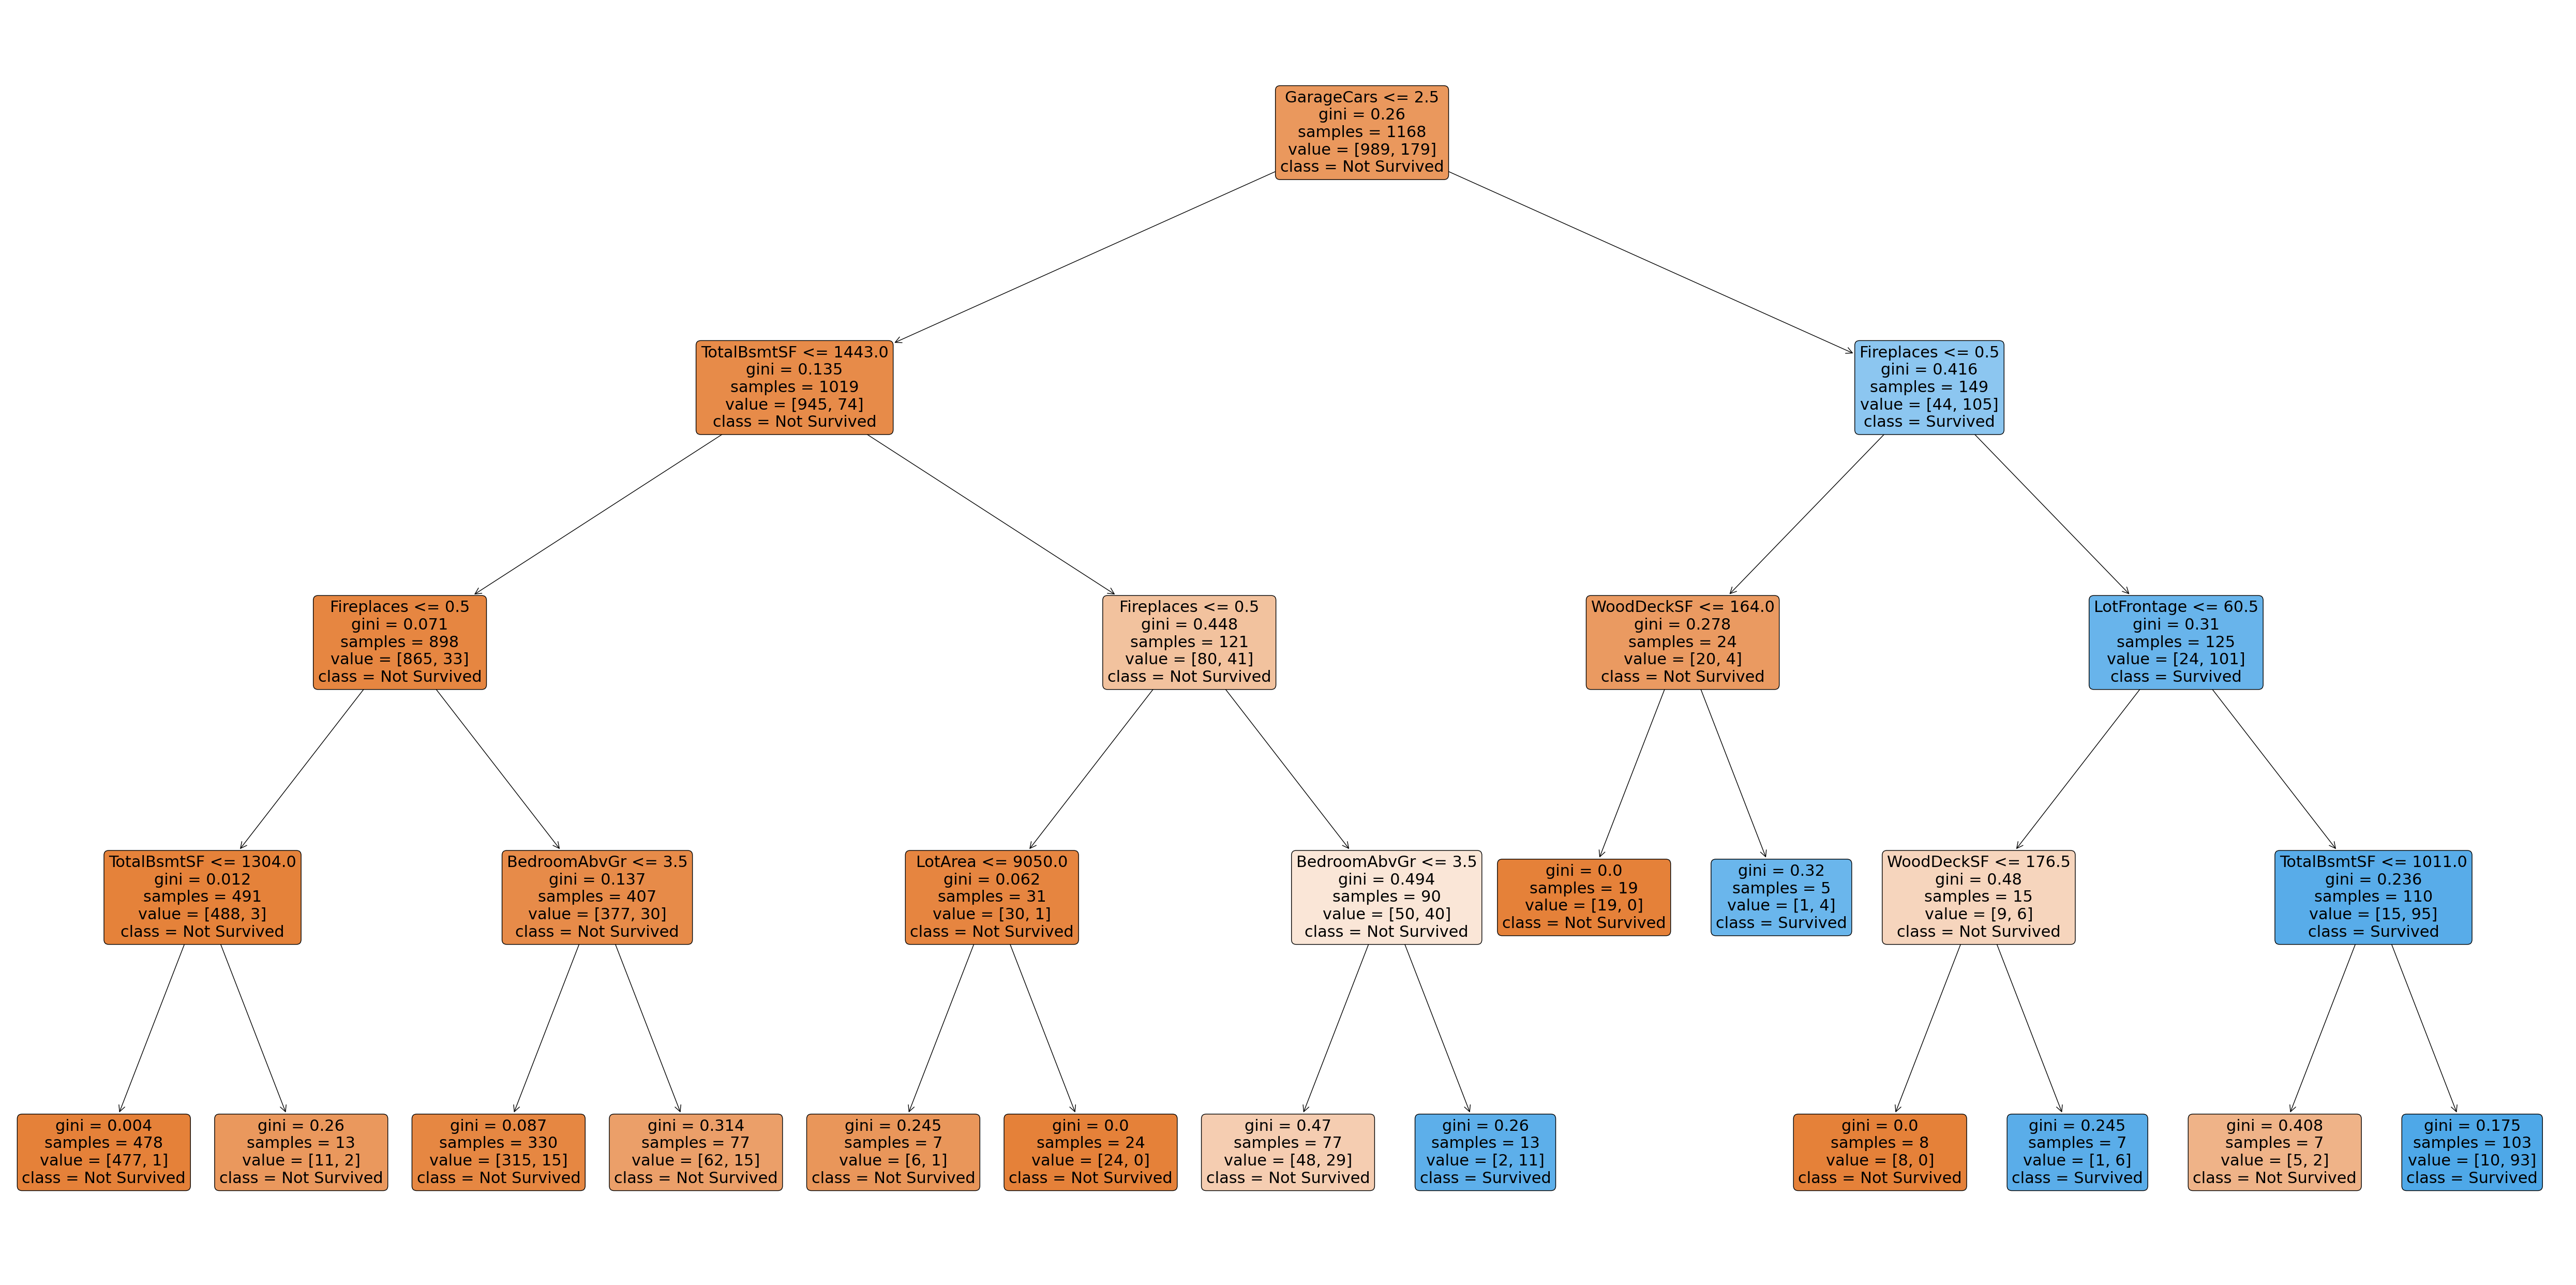

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=list(X.columns)
     );

# Building an pipeline

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

## Initialize transformer and model

In [25]:
imputer = SimpleImputer(strategy="median")
dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_leaf=10,
                               random_state=42)

### Create a pipeline

In [26]:
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

Note that make_pipeline is just a slightly more concise function than Pipeline, as it does not require you to name each step, but their behaviour is equivalent.

In [27]:
from sklearn.pipeline import Pipeline
pipe_2 = Pipeline([("imputer", imputer), ("classifier", dtree)]).set_output(transform='pandas')

## 2. Fit the pipeline to the training data

In [28]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

If you want pipe steps presented like text:

In [30]:
from sklearn import set_config

set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])


To switch back to diagram:

In [31]:
set_config(display="diagram")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=42))])

## Use the pipeline to make predictions

In [32]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

Now, the object pipe can take (almost) raw data as input and output predictions. We no longer need to impute missing values and use the model to make predictions in separate steps.

# 3.&nbsp; Use GridSearchCV to find the best

---

parameters of the model

So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

- It's not efficient in terms of quickly finding the best combination of parameters.
- If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development —we have been cheating a bit!

Grid Search Cross Validation solves both issues:

* Read the lesson "Housing Prices: Iteration 2, Grid Search & Cross Validation" on the platform.

* Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [33]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()

In [34]:
# 2. Create a pipeline
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [35]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

To define the parameter grid for cross validation, you need to create a dictionary, where:

- The keys are the name of the pipeline step, followed by two underscores and the name of the parameter you want to tune.
- The values are lists (or "ranges") with all the values you want to try for each parameter.

In [36]:
for value in range(2, 12, 2):
    print(value)

2
4
6
8
10


In [37]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

When defining the cross validation, we want to pass our pipeline (`pipe`), our parameter grid (`param_grid`) and the number of folds (an arbitrary number, usually 5 or 10). You can also define the parameter `verbose` if you want to recieve a bit more info about the CV task.

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      verbose=1) # we want informative outputs during the training process

Fit your "search" to the training data (`X` and `y`), as we used to do with our model alone or with our pipeline:

In [40]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

Explore the best parameters and the best score achieved with your cross validation:

In [41]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 38}

In [42]:
# the mean cross-validated score of the best estimator
search.best_score_

0.9280950808847805

In [43]:
# training accuracy
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9332191780821918

In [44]:
# testing accuracy
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.934931506849315

# 4.&nbsp; Use GridSearchCV to find the best parameters of the pipeline

Add a scaler to the pipeline, and use GridSearchCV to tune the parameters of the scaler, as well as the parameters of the imputer and the decision tree.

This shows how Grid Search Cross Validation can be used to not only tune the parameters of the model but also the parameters of all the transformers in a pipeline, thus helping us find the best preprocessing strategy for our data.

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# initialize transformers & model
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

In [47]:
# create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree).set_output(transform='pandas')

We can see the steps in the pipeline (note that they have been given names: `simpleimputer` and `decisiontreeclassifier`. we will use these names when defining the parameter grid for the cross validation)

In [48]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [49]:
# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [50]:
# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=1)

In [51]:
# fit
search.fit(X_train, y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [52]:
# cross validation average accuracy
search.best_score_

0.929804008252284

In [53]:
# best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'simpleimputer__strategy': 'median',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}